In [1]:
import csv
import pickle
import datetime

In [2]:
from statsmodels.compat.pandas import sort_values
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf


In [51]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [5]:
data = pd.read_csv('data/data.csv')
data=data.iloc[:,1:]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
new_order =  ['date', 'units', 'item_nbr', 'store_nbr','station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC' ]

In [7]:
data = data[new_order]

In [8]:
data.units = data.units.astype(int)

In [9]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:,:-1], data.units
X_train, X_testm, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
def fulldf(df):
    
    df.snowfall = df.snowfall.replace(["T","  T"],0.05)
    df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
    df.depart = pd.to_numeric(df.depart, errors='coerce')
    
    df = type_change_numeric(df,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir' ])
    df['date'] = pd.to_datetime(df['date'])
    df["week_day_name"] = df['date'].dt.weekday_name
    df["day_of_year"] = df['date'].dt.dayofyear
    df["year"] = df['date'].dt.year
    
    
    
    for idx in range(5, 8):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)

    for idx in range(16, 23):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)
    add_depart1(df)
    
    return df

# for column in item37.columns:
#     item37[column].interpolate()


In [11]:
def itemdf(df, nbr):
    item_nbr = df[df.item_nbr == nbr]
    for idx in range(5, 8):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    
    for idx in range(16, 23):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    add_depart1(item_nbr)
    
    return item_nbr
    

In [12]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            #df = df.replace(["M",None], '')
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

#예시

# data = type_change_numeric(data,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
#        'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
#        'avgspeed', 'resultspeed', 'resultdir' ])

In [13]:
def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

In [14]:
train = pd.concat([X_train, y_train] ,axis = 1)

In [16]:
train = train.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [ ]:
### 시계열 보기

In [17]:
data = fulldf(data)

In [20]:
data37 = data[data.item_nbr == 37]
#data37 = data37[data37.store_nbr == 10]

In [35]:
data37 = data37.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [36]:
data37.head()

,index,date,units,item_nbr,store_nbr,station_nbr,tmax,tmin,tavg,depart,...,SQ,FZ,MI,PR,BC,BL,VC,week_day_name,day_of_year,year
0,55839,2012-01-01,16,37,5,12,72.0,48.0,60.0,0.00,...,False,False,False,False,False,False,False,Sunday,1,2012
1,55844,2012-01-01,32,37,10,12,72.0,48.0,60.0,0.00,...,False,False,False,False,False,False,False,Sunday,1,2012
2,143727,2012-01-01,28,37,12,11,72.0,48.0,60.0,7.00,...,False,False,False,False,False,False,False,Sunday,1,2012
3,215073,2012-01-01,85,37,17,20,59.0,41.0,50.0,2.33,...,False,False,False,False,False,False,False,Sunday,1,2012
4,96169,2012-01-01,17,37,18,17,56.0,38.0,47.0,8.67,...,False,False,False,False,False,False,False,Sunday,1,2012


In [38]:
data37_sum = data37.groupby('date')['units'].sum()

In [66]:
data37_sum.isnull().any()

False

In [74]:
data_log = pd.DataFrame(data37_sum)

In [75]:
data_log.units = data_log.units.apply(lambda x: np.log(x + 1))

In [76]:
data_log.isnull().any()

units    False
dtype: bool

In [ ]:
data_t = data37.iloc[:730, :]

In [ ]:
data_f = data37.iloc[730:, :]

In [ ]:
1033-730

In [ ]:
data37.tail()

In [27]:
p = data37.pivot(index = "date", columns = "store_nbr", values = "units").astype(float)

In [37]:
16+32+28+85+17+16

194

In [29]:
p.head()

store_nbr,5,10,12,17,18,43
date,,,,,,
2012-01-01,16.0,32.0,28.0,85.0,17.0,16.0
2012-01-02,29.0,33.0,41.0,68.0,16.0,41.0
2012-01-03,18.0,26.0,25.0,97.0,8.0,30.0
2012-01-04,16.0,25.0,32.0,51.0,17.0,19.0
2012-01-05,17.0,26.0,27.0,69.0,18.0,26.0


In [25]:
p.values.astype(float)

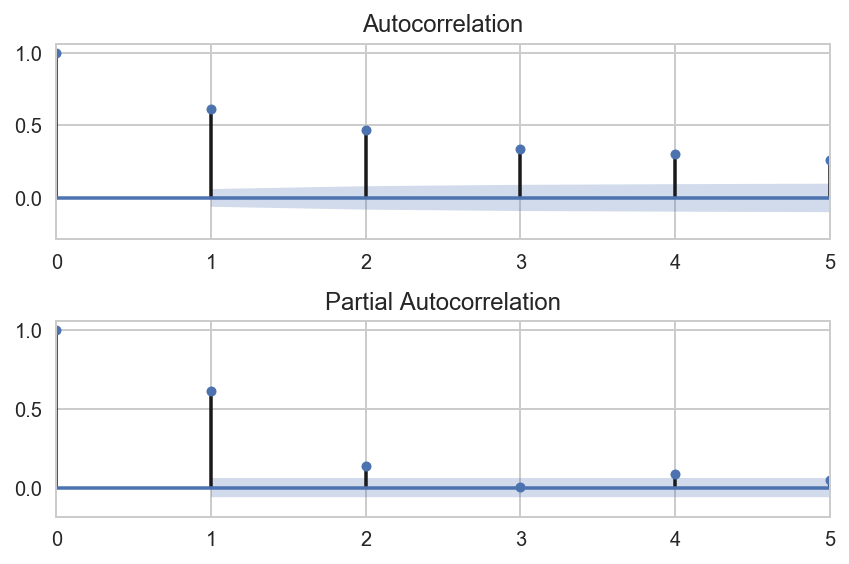

In [80]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(data_log, ax=ax1)
plt.xlim(0,5)
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(data_log, ax=ax2)
plt.xlim(0,5)
plt.tight_layout()
plt.show()

In [85]:
y37 = y_test[X_test.item_nbr == 37]

NameError: name 'X_test' is not defined

In [81]:
m = sm.tsa.ARMA(data_log, (1, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                  units   No. Observations:                 1034
Model:                     ARMA(1, 1)   Log Likelihood                -413.784
Method:                       css-mle   S.D. of innovations              0.361
Date:                Thu, 05 Jul 2018   AIC                            835.569
Time:                        12:05:30   BIC                            855.333
Sample:                    01-01-2012   HQIC                           843.069
                         - 10-31-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7234      0.036    132.368      0.000       4.653       4.793
ar.L1.units     0.7629      0.034     22.761      0.000       0.697       0.829
ma.L1.units    -0.2441      0.052     -4.686    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [89]:
item37 = data[data.item_nbr == 37]

In [90]:
item37 = item37.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [91]:
item37.tmax.fillna(item37.groupby(["day_of_year","store_nbr"])['tmax'].transform('mean'), inplace=True) 

In [ ]:
item37 = item37[item37.tmax.isnull() == False]
item37 = item37[item37.tmin.isnull() == False]
item37 = item37[item37.dewpoint.isnull() == False]
item37 = item37[item37.wetbulb.isnull() == False]
item37 = item37[item37.preciptotal.isnull() == False]

In [ ]:
item37.isnull().any()

In [ ]:
data.snowfall = data.snowfall.replace(["T","  T"],0.05)
data.preciptotal = data.preciptotal.replace(["T","  T"],0.005)
data.depart = pd.to_numeric(data.depart, errors='coerce')



In [ ]:
data['date'] = pd.to_datetime(data['date'])
#data['sunrise'] = pd.to_datetime(data['sunrise'], format='%H%M' , errors='coerce')
#data['sunset'] = pd.to_datetime(data['sunset'], format='%H%M' , errors='coerce')
#X_testm['date'] = pd.to_datetime(X_testm['date'] , errors='coerce')
#X_testm['sunrise'] = pd.to_datetime(X_testm['sunrise'], format='%H%M' , errors='coerce')
#X_testm['sunset'] = pd.to_datetime(X_testm['sunset'], format='%H%M' , errors='coerce')

In [ ]:
data["week_day_name"] = data.date.dt.weekday_name
data["day_of_year"] = data.date.dt.dayofyear
data["year"] = data.date.dt.year

In [ ]:
#data.tmax.fillna(data.groupby(["day_of_year","store_nbr"])['tmax'].transform('mean'), inplace=True)
data = data.replace(["M",None], '')

In [ ]:
for idx in range(5, 8):
    item37.iloc[:,idx].fillna(item37.groupby(["day_of_year","store_nbr"])[item37.columns[idx]].\
                              transform('mean'), inplace=True)

In [ ]:
for idx in range(16, 23):
    item37.iloc[:,idx].fillna(item37.groupby(["day_of_year","store_nbr"])[item37.columns[idx]].\
                              transform('mean'), inplace=True)

In [ ]:
item37['weekend'] = False
item37.weekend[item37['week_day_name'] == 'Sunday'] = True
item37.weekend[item37['week_day_name'] == 'Saturday'] = True
item37.weekend[item37['week_day_name'] == 'Friday'] = True

In [ ]:
item37['reldate'] = 0
item37.reldate[ item37.date.dt.year == 2012] = item37.date.dt.dayofyear
item37.reldate[ item37.date.dt.year != 2012] = item37.date.dt.dayofyear + (item37.date.dt.year- 2012)*365 + 1

In [ ]:
item37.isnull().any()

In [ ]:
item37_df.head()

In [ ]:
item37.columns

In [ ]:
item37.columns =['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed',
       'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS',
       'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ', 'MI', 'PR',
       'BC', 'BL', 'VC', 'units', 'week_day_name', 'day_of_year', 'year',
       'weekend']

#### OLS

In [ ]:
model = sm.OLS.from_formula("units ~  C(store_nbr) + tmax + tmin + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37)
#model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

result1 = model.fit()


In [ ]:
item37['logunits'] = item37.units.apply(lambda X: np.log(X) + 1)

In [ ]:
item37.head()

In [ ]:
print(result1.summary())

In [ ]:
model = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed)   + C(weekend) + 0" , data = item37)
model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

result1 = model.fit()
print(result1.summary())

In [87]:
pickle.dump( item37, open( "item37.p", "wb" ) )

NameError: name 'item37' is not defined

In [ ]:
log_model = sm.OLS.from_formula("logunits ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed)   + C(weekend) + 0" , data = item37)
#model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

log_result1 = log_model.fit()
print(log_result1.summary())

In [ ]:
model2 = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed) + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37)


result2 = model2.fit()
print(result2.summary())